# NI-VSM HW 1

Tým:

- Bittner Jan
- Bodnárová Radka
- Hošková Radka

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# HW1 settings
K = 16
L = len("Bittner")
X = ((K * L * 23) % 20) + 1
Y = ((X + ((K * 5 + L * 7) % 19)) % 20) + 1

x_file = str(X).zfill(3) + ".txt" # file name
xx = open("../resources/" + x_file).readlines()[1:][0].replace(" ", "␣") # file content
x_len = len(xx) # content length
x_chars = Counter(xx) # chars count

y_file = str(Y).zfill(3) + ".txt" # file name
yy = open("../resources/" + y_file).readlines()[1:][0].replace(" ", "␣") # file content
y_len = len(yy) # content length
y_chars = Counter(yy) # chars count

In [2]:
# 1 -- odhadnout pst znaků, graficky znázornit

# Returns dictionary of char: pst
def get_charpst(chars, char_len):
    charspst = {}
    for char in chars.keys():
        char_frequency = chars[char] / char_len
        charspst[char] = char_frequency
    return {k: charspst[k] for k in sorted(charspst.keys())}

# Draws a plot sorted by char and a plot sorted by frequency
def draw_double_plot(chars, char_len, caption):
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))
    fig.suptitle(caption)

    x_charfreq = get_charpst(chars, char_len)
    bar_x_locations = np.arange(len(x_charfreq))

    plt.sca(axs[0])
    plt.bar(bar_x_locations, x_charfreq.values(), align = 'center')
    plt.xticks(bar_x_locations, x_charfreq.keys())
    plt.grid()

    plt.sca(axs[1])
    x_charfreq = dict(sorted(x_charfreq.items(), key=lambda item: item[1], reverse=True))
    bar_x_locations = np.arange(len(x_charfreq))
    plt.bar(bar_x_locations, x_charfreq.values(), align = 'center')
    plt.xticks(bar_x_locations, x_charfreq.keys())
    plt.grid()
    plt.show()

In [3]:
# 2 -- spočíst entropii

# Returns entrophy
def get_entropy(chars, char_len):
    entropy = 0
    for char in chars.keys():
        char_frequency = chars[char] / char_len
        entropy += (- (char_frequency * math.log(char_frequency, 2)))

    return entropy

x_entropy = get_entropy(x_chars, x_len)
y_entropy = get_entropy(y_chars, y_len)

In [4]:
# 3 -- nalézt optimální binární instantní kód C pro kódování znaků PRVNÍHO z textů

# Recursively builds code from binary tree
def build_encoding_from_tree(tree, code = ''):
    # either tuple or string (tree list)
    if type(tree) == str:
        return {tree: code}

    # recursion
    left = build_encoding_from_tree(tree[0], code + '1')
    right = build_encoding_from_tree(tree[1], code + '0')

    # Unpact left and right dicts
    return {**left, **right}

# Parses char: count dictionary to binary tree
def parse_characters_to_tree(chars_counter):
    tree = chars_counter.most_common()[::-1]

    while len(tree) > 1:
        # sort
        tree.sort(key=lambda elem: elem[1])

        # get first and second worst (that is least common) chars
        first_worst = tree[0]
        second_worst = tree[1]
        rest = tree[2:]

        # concat first and second worst chars
        # [(char_1, char_2), value_1 + value_2] + rest of the list
        tree = [((first_worst[0], second_worst[0]), first_worst[1] + second_worst[1])] + rest

    # root of parsed tree
    return tree[0][0]

# Get encoding map
def get_encoding(chars_counter):
    return build_encoding_from_tree(parse_characters_to_tree(chars_counter))

C = get_encoding(x_chars)

In [5]:
# 4 -- pro každý text spočítat střední délku kódu C a porovnat s entropií

# Get mean from character frequency dict in an encoding
def get_mean(charpst, encoding):
    res = 0
    for char in charpst:
        res += charpst[char] * len(encoding[char])
    return res

x_mean = str(get_mean(get_charpst(x_chars, x_len), encoding=C))
y_mean = str(get_mean(get_charpst(y_chars, y_len), encoding=C))

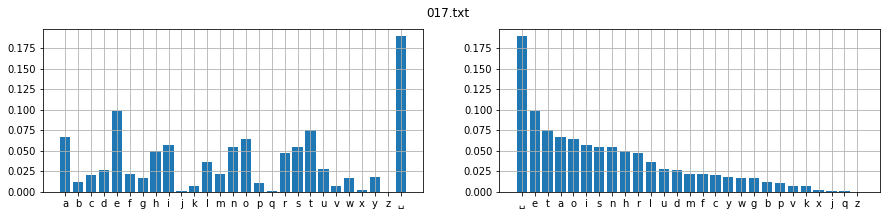

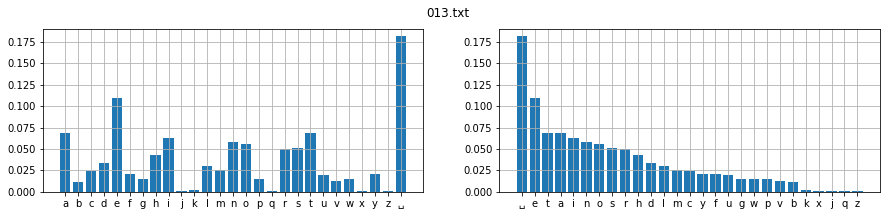

In [6]:
draw_double_plot(x_chars, x_len, x_file)
draw_double_plot(y_chars, y_len, y_file)

Z grafů výše je patrné,
že odhadovaná pravděpodobnost znaků obou textů si je až na pár vyjímek velmi podobná.
Nejčetnějším znakem obout textů je mezera, následně znaky `e`, `t`, `a` atd.

In [7]:
print(f'Optimálni binární instantní kód C pro první z textů {x_file}')
C

Optimálni binární instantní kód C pro první z textů 017.txt


{'m': '11111',
 'p': '111101',
 'b': '111100',
 'r': '1110',
 'e': '110',
 'h': '1011',
 'd': '10101',
 'u': '10100',
 'n': '1001',
 's': '1000',
 'i': '0111',
 'o': '0110',
 'a': '0101',
 'g': '010011',
 'v': '0100101',
 'z': '01001001111',
 'q': '01001001110',
 'j': '0100100110',
 'x': '010010010',
 'k': '01001000',
 'w': '010001',
 'y': '010000',
 't': '0011',
 'l': '00101',
 'c': '001001',
 'f': '001000',
 '␣': '000'}

In [8]:
print(f"Pro {x_file}:")
print(f"L(C) = {x_mean}")
print(f"Entropie = " + str(x_entropy))

print()

print(f"Pro {y_file}:")
print(f"L(C) = {str(get_mean(get_charpst(y_chars, y_len), encoding=C))}")
print(f"Entropie = " + str(y_entropy))

Pro 017.txt:
L(C) = 4.121329557311073
Entropie = 4.0777240009434665

Pro 013.txt:
L(C) = 4.136199759647483
Entropie = 4.095573706179031


Jak je vidět z údajů výše,
pro oba soubory je entropie souborů menší než střední délka kódu.

Současně je toto kódování optimální i pro druhý text,
jelikož platí vztah `H_D(Y) <= L(C) < H_D(Y) + 1`.

V úloze se povedlo analyzovat vstupní texty `013.txt` a `017.txt`,
určit četnost jejich znaků,
pravděpodobnost jednotlivých znaků,
entropii pro dané texty,
nálézt optimální binární instantní kód pro kódování znaků prvního z textů
a pro každý text spočítat střední délku kódu C a porovnat ji s entropií pro dané texty.